<a href="https://colab.research.google.com/github/ZarinNushiba/ETE-456_LabProjects/blob/main/1608006_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name of the experiment: Introduction to Deep Neural Network (DNN)

Course No: ETE-456

Name: Zarin Nushiba

ID: 1608006

 Objective: 
 1. To analyze classification problems using Deep Neural Network
 2. To develop DNN models using Tensorflow Framework

#Task: 
To predict the possibility of a patient being diabetic 


#Import the libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Download the dataset

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 15:55:34--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 15:55:35--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc78fe9e459e4992b3cf568b0a44.dl.dropboxusercontent.com/cd/0/inline/BcMRh4FxJN__Ld0a1vbaNB2FwOdoz02IyPHq9YnUYY7FOekCqImbqoWnqL2c9WbueSqKoHuc8cH5j2jJUQh4WTPB4dA_j8x5W3ZbpC7a5iKEh-AsbieMg-1NGinCKcwYfdYtHBGvLgyceXO7xIeK9F2W/file# [following]
--2021-12-20 15:55:35--  https://uc78fe9e459e4992b3cf568b0a44.dl.dropboxusercontent.com/cd/0/inline/BcMRh4FxJN__Ld0a1vbaNB2FwOdoz02IyPHq9YnUYY7FOekCqImbqoWnqL2c9WbueSqKoHuc8cH5j2jJUQh4W

#Importing the dataset


In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Exploratory Data analysis
The inter-correlation between the features is determined through this method

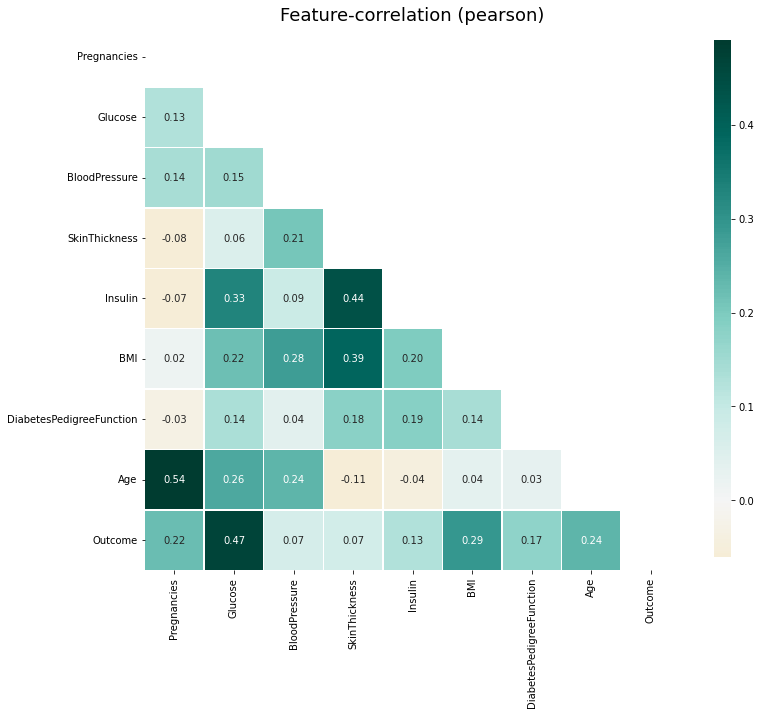

In [ ]:
! pip install klib
import klib
klib.corr_mat(dataset) # returns a color-encoded correlation matrix
klib.corr_plot(dataset)

Now the dataset needs to be split into independent and dependent values which are features and target respectively. Target values are dependent on feature values as the targets need to be predicted with the help of feature values.

In [ ]:
feature = dataset[[	'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


#Taking care of  missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(feature[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [ ]:
feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]= imputer.transform(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['Outcome']])

In [ ]:
target[['Outcome']]= imputer.transform(target[['Outcome']])

In [ ]:
target

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


#Spliting the Dataset into Training Set and Test Set

In [ ]:
#Spliting the Dataset into Training Set and Test Set
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,4.0,142.0,86.0,0.0,0.0,44.0,0.645,22.0
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[98,  9],
       [18, 29]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



#K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[87 20]
 [18 29]]
              precision    recall  f1-score   support

          No       0.83      0.81      0.82       107
         Yes       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



#Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[97 10]
 [18 29]]
              precision    recall  f1-score   support

          No       0.84      0.91      0.87       107
         Yes       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



#Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[79 28]
 [17 30]]
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       107
         Yes       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[79 28]
 [17 30]]
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       107
         Yes       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



#Neural Network

Building a Multilayer Neural Network with Tensorflow Keras.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#To built the neural network architecture

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


#Binary Crossentropy


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training the Model

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 2s 30ms/step - loss: 3.5882 - accuracy: 0.4847 - val_loss: 1.9397 - val_accuracy: 0.6098
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.9434 - accuracy: 0.5723 - val_loss: 1.4675 - val_accuracy: 0.4715
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.6568 - accuracy: 0.5193 - val_loss: 1.3884 - val_accuracy: 0.6016
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 1.5118 - accuracy: 0.5560 - val_loss: 1.2066 - val_accuracy: 0.5122
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 1.4339 - accuracy: 0.5703 - val_loss: 1.1199 - val_accuracy: 0.5772
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 1.3207 - accuracy: 0.5682 - val_loss: 1.0839 - val_accuracy: 0.5691
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 1.2386 - accuracy: 0.5804 - val_loss: 1.0931 - val_accuracy: 0.6504
Epoch 8/100


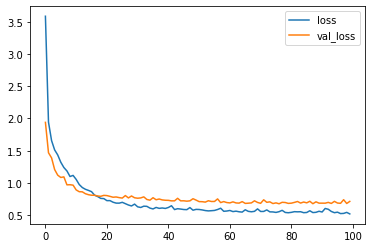

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

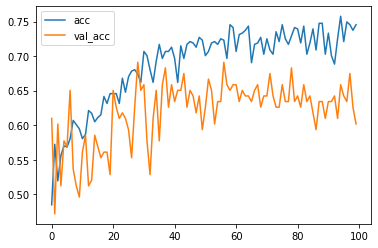

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
y_test

,Outcome
661,1.0
122,0.0
113,0.0
14,1.0
529,0.0
...,...
476,1.0
482,0.0
230,1.0
527,0.0


In [ ]:
y_pred

array([[0.9778372 ],
       [0.26242328],
       [0.29552382],
       [0.87325776],
       [0.51541966],
       [0.07254145],
       [0.8378574 ],
       [0.7061403 ],
       [0.47296962],
       [0.8017394 ],
       [0.77775526],
       [0.8900924 ],
       [0.42272753],
       [0.42797032],
       [0.14955753],
       [0.36132026],
       [0.9264845 ],
       [0.3701215 ],
       [0.44054958],
       [0.42277476],
       [0.46303645],
       [0.6384942 ],
       [0.96648407],
       [0.05367336],
       [0.17770514],
       [0.756251  ],
       [0.2612884 ],
       [0.74609756],
       [0.4075463 ],
       [0.61257344],
       [0.79914224],
       [0.41208005],
       [0.04691333],
       [0.8600099 ],
       [0.27707124],
       [0.71086466],
       [0.788671  ],
       [0.055655  ],
       [0.6876222 ],
       [0.7581154 ],
       [0.44244212],
       [0.2701341 ],
       [0.10545567],
       [0.901323  ],
       [0.9942008 ],
       [0.31155258],
       [0.32230073],
       [0.596

In [ ]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [ ]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76       107
         1.0       0.51      0.81      0.63        47

    accuracy                           0.71       154
   macro avg       0.70      0.74      0.69       154
weighted avg       0.77      0.71      0.72       154



#Result Analysis: 
With respect to F1_square:  

Logistic Regression :
1.   Weighted avg: 82%
2.   Accuracy: 82%


K-Nearest Neighbour: 
1.   Weighted avg: 75%
2.   Accuracy: 75%

Support vector classifier: 
1.   Weighted avg: 81%
2.   Accuracy: 82%

Decision tree regression: 
1.   Weighted avg: 72%
2.   Accuracy: 71%

Random Forest regression: 
1.   Weighted avg: 72%
2.   Accuracy: 71%
